In [92]:
import pandas as pd
import numpy as np

### Preparing data for cattleplusrat

In [25]:
df = pd.read_csv('cattleplusrat.csv',sep=';') 

/Users/liwenxing/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,7,8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
df

,assay_type,target_type,tax_id,organism,relation,type,value,units,standard_relation,standard_type,...,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations
0,A,ORGANISM,9913,Bos taurus,=,K,11700.0,M-1,=,K,...,NEUTRAL,241.29,3.0,18.0,0.61,241.1103,C15H15NO2,3.0,0.0,0.0
1,A,ORGANISM,9913,Bos taurus,=,K,10100.0,M-1,=,K,...,NEUTRAL,228.25,3.0,17.0,0.55,228.0786,C14H12O3,3.0,0.0,0.0
2,A,ORGANISM,9913,Bos taurus,=,K,736.0,M-1,=,K,...,NEUTRAL,216.19,3.0,16.0,0.59,216.0423,C12H8O4,4.0,0.0,0.0
3,A,ORGANISM,9913,Bos taurus,=,Km,3.9,mM,=,Km,...,ACID,303.22,2.0,20.0,0.55,303.0733,C9H14N5O5P,10.0,5.0,0.0
4,A,ORGANISM,9913,Bos taurus,=,Km,2.7,mM,=,Km,...,ACID,289.19,2.0,19.0,0.40,289.0576,C8H12N5O5P,10.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747957,T,TISSUE,9986,Oryctolagus cuniculus,=,Activity,-4.3,%,=,Activity,...,NEUTRAL,613.15,1.0,34.0,0.37,496.2816,C29H45ClN4O8,8.0,5.0,0.0
747958,T,TISSUE,9986,Oryctolagus cuniculus,=,Activity,-3.7,%,=,Activity,...,NEUTRAL,636.12,2.0,36.0,0.47,519.2412,C30H39ClFN5O7,8.0,4.0,1.0
747959,T,TISSUE,9986,Oryctolagus cuniculus,=,Activity,-3.5,%,=,Activity,...,NEUTRAL,613.15,1.0,34.0,0.37,496.2816,C29H45ClN4O8,8.0,5.0,0.0
747960,T,TISSUE,9986,Oryctolagus cuniculus,=,Activity,-4.6,%,=,Activity,...,NEUTRAL,611.18,1.0,34.0,0.49,494.3024,C30H47ClN4O7,7.0,4.0,0.0


In [88]:
df_cattleplusrat = df_cattleplusrat.drop(columns=['alogp', 'hba', 'hbd', 'psa', 'rtb', 'ro3_pass', 
                                                  'num_ro5_violations', 'cx_most_apka', 'cx_most_bpka', 'full_mwt', 
                                                  'cx_logp', 'cx_logd', 'molecular_species', 'mw_freebase', 
                                                  'aromatic_rings', 'heavy_atoms', 'qed_weighted', 'mw_monoisotopic', 
                                                  'full_molformula', 'hba_lipinski', 'hbd_lipinski', 
                                                  'num_lipinski_ro5_violations', 'assay_type', 'target_type', 'tax_id', 
                                                  'molregno', 'molregno.1', 'structure_type', 'molecule_type', 'chirality', 
                                                  'natural_product', 'relation', 'standard_inchi', 
                                                  'standard_relation', 'type', 'value', 'units'])
df_cattleplusrat

,organism,standard_type,standard_value,standard_units,chembl_id,canonical_smiles
0,Bos taurus,K,11700.0,M-1,CHEMBL24556,Cc1cc2c(o1)c(C)cc1c(C)cc(=O)n(C)c12
1,Bos taurus,K,10100.0,M-1,CHEMBL285692,Cc1cc2c(o1)c(C)cc1c(C)cc(=O)oc12
2,Bos taurus,K,736.0,M-1,CHEMBL416,COc1c2occc2cc2ccc(=O)oc12
3,Bos taurus,Km,3900000.0,nM,CHEMBL19976,CC(COCP(=O)(O)O)n1cnc2c(O)nc(N)nc21
4,Bos taurus,Km,2700000.0,nM,CHEMBL223737,Nc1nc2c(ncn2CCOCP(=O)(O)O)c(=O)[nH]1
...,...,...,...,...,...,...
747957,Oryctolagus cuniculus,Activity,-4.3,%,CHEMBL2387453,CC[C@H](C[C@H](O)[C@@H](N)CN1CC(=O)N(c2ccccc2C...
747958,Oryctolagus cuniculus,Activity,-3.7,%,CHEMBL2387557,CC(C)[C@H](C[C@H](O)[C@@H](N)CN1CC(=O)N(c2cccc...
747959,Oryctolagus cuniculus,Activity,-3.5,%,CHEMBL2387453,CC[C@H](C[C@H](O)[C@@H](N)CN1CC(=O)N(c2ccccc2C...
747960,Oryctolagus cuniculus,Activity,-4.6,%,CHEMBL2387446,CC(C)[C@H](C[C@H](O)[C@@H](N)CN1CC(=O)N(c2cccc...


In [89]:
seen = {}
for index, row in df_cattleplusrat.iterrows():
    act_type = str(row['standard_type']) + ' /' + str(row['standard_units'])
    if act_type not in seen:
        seen[act_type] = 1
    else:
        seen[act_type] += 1

seen_sorted = sorted(seen.items(), key=lambda x: x[1], reverse=True) 
print(seen_sorted)
len(seen_sorted)

[('Tissue Severity Score /nan', 125600), ('Activity /nan', 36492), ('T1/2 /hr', 23286), ('WEIGHT /g', 18548), ('CL /mL.min-1.kg-1', 16276), ('F /%', 14400), ('Activity /%', 11164), ('AUC /ng.hr.mL-1', 11147), ('Drug uptake /% ID/g', 10700), ('IC50 /nM', 10000), ('CHOL /ug.mL-1', 8413), ('GLUC /ug.mL-1', 8413), ('BUN /ug.mL-1', 8413), ('CREAT /ug.mL-1', 8413), ('PHOS /ug.mL-1', 8413), ('ALB /ug.mL-1', 8413), ('RBC /cells.uL-1', 8412), ('HCT /%', 8412), ('MCV /fL', 8412), ('PROT /ug.mL-1', 8412), ('WBC /cells.uL-1', 8411), ('HGB /ug.mL-1', 8409), ('MCH /pg', 8409), ('SODIUM /mEq.L-1', 8409), ('POTASSIUM /mEq.L-1', 8409), ('PLAT /cells.uL-1', 8393), ('NEUTLE /%', 8382), ('EOSLE /%', 8382), ('BASOLE /%', 8382), ('MONOLE /%', 8382), ('LYMLE /%', 8382), ('BILI /ug.mL-1', 8332), ('Cmax /ug.mL-1', 7202), ('Vdss /L.kg-1', 6821), ('AUC /uM.hr', 5795), ('Tmax /hr', 5710), ('LD50 /mg.kg-1', 5368), ('MCHC /%', 4709), ('RETIRBC /%', 4709), ('ALP /IU.L-1', 4709), ('TRIG /ug.mL-1', 4709), ('PHOSLPD /u

1984

In [90]:
header_list = ['T1/2 /hr', 'F /%', 'AUC /ng.hr.mL-1', 'Drug uptake /% ID/g', 'IC50 /nM', 
               'Cmax /ug.mL-1', 'Vdss /L.kg-1', 'CL /mL.min-1.kg-1', 'LD50 /mg.kg-1', 'PPB /%', 'Drug metabolism /nan',
               'Distribution /%', 'ED50 /mg.kg-1', 'Permeability /nan', 'Ratio /nan', 'Papp /ucm/s']


In [91]:
useless_headers = ['Tissue Severity Score', 'WEIGHT', 'BUN', 'ALT', 'ALP', 'CHOL', 'GLUC', 'CREAT', 'PHOS', 'ALB', 
                   'AST', 'RBC', 'HCT', 'MCV', 'PROT', 'WBC', 'HGB', 'MCH', 'MCHC', 'SODIUM', 'POTASSIUM', 'PLAT', 
                   'NEUTLE', 'EOSLE', 'BASOLE', 'MONOLE', 'LYMLE', 'BILI', 'Stabilty', 'Stability', 'Cl', 'RETIRBC', 
                   'TRIG', 'PHOSLPD', 'CALCIUM', 'ALBGLOB', 'GGT', 'TERMBW', 'BILDIR', 'PT', 'APTT', 'FIBRINO', 
                   'CHLORIDE', 'CK', 'LIPASE', 'URATE', 'Fu', 'CO2', 'BASO', 'EOS' 'LYM', 'MONO', 'NEUTSG', 'RBCNUC',
                   'TD50', 'ID/g', 'Vd', 'CLH', 'CC50', 'TIME', 'MTD', 'UI', 'Dose/organ', 'Concentration', 'Survival', 
                   'Radiolabel recovery', 'GI50', 'Dose/g', 'Radioactivity', 'Activity', 'Cp', 'LDH', 'Tmax', 'EOS',
                   'LYM', 'Biodistribution', 'Injected dose/g', 'Cp(f)', 'Ratio TD50/ED50', 'ERH', 
                   'Distribution of radioactivity', 'Plasma level']


In [92]:
for header in useless_headers:
    index_names = df_cattleplusrat[df_cattleplusrat['standard_type'] == header].index
    df_cattleplusrat.drop(index_names, inplace = True)

df_cattleplusrat = df_cattleplusrat.reset_index(drop=True)
df_cattleplusrat

,organism,standard_type,standard_value,standard_units,chembl_id,canonical_smiles
0,Bos taurus,K,11700.0,M-1,CHEMBL24556,Cc1cc2c(o1)c(C)cc1c(C)cc(=O)n(C)c12
1,Bos taurus,K,10100.0,M-1,CHEMBL285692,Cc1cc2c(o1)c(C)cc1c(C)cc(=O)oc12
2,Bos taurus,K,736.0,M-1,CHEMBL416,COc1c2occc2cc2ccc(=O)oc12
3,Bos taurus,Km,3900000.0,nM,CHEMBL19976,CC(COCP(=O)(O)O)n1cnc2c(O)nc(N)nc21
4,Bos taurus,Km,2700000.0,nM,CHEMBL223737,Nc1nc2c(ncn2CCOCP(=O)(O)O)c(=O)[nH]1
...,...,...,...,...,...,...
182820,Oryctolagus cuniculus,HD50,191.0,uM,CHEMBL392453,CCCNC(=O)[C@]12CC[C@](C)(C(=O)OC)C[C@H]1C1=CC[...
182821,Oryctolagus cuniculus,HD50,NaN,NaN,CHEMBL238261,CCNC(=O)[C@]12CC[C@](C)(C(=O)OC)C[C@H]1C1=CC[C...
182822,Oryctolagus cuniculus,HD50,276.2,uM,CHEMBL392240,CNC(=O)[C@]12CC[C@](C)(C(=O)OC)C[C@H]1C1=CC[C@...
182823,Oryctolagus cuniculus,HD50,2.4,uM,CHEMBL392239,COC(=O)[C@@]1(C)CC[C@]2(C(=O)N(C(=O)NC3CCCCC3)...


In [93]:
for i in header_list:
    df_cattleplusrat[i] = np.nan

rows_to_drop = []

for index, row in df_cattleplusrat.iterrows():
    act_type = str(row['standard_type']) + ' /' + str(row['standard_units'])
    if act_type in header_list:
        header = act_type
        df_cattleplusrat.loc[index, header] = row['standard_value']
    else:
        rows_to_drop.append(index)

df_cattleplusrat.drop(rows_to_drop, inplace = True)

df_cattleplusrat = df_cattleplusrat.sort_values(by=['chembl_id'], ascending=False).reset_index(drop=True)

In [95]:
df_cattleplusrat = df_cattleplusrat.drop(columns=['standard_type', 'standard_value', 'standard_units'])
df_cattleplusrat

,organism,chembl_id,canonical_smiles,T1/2 /hr,F /%,AUC /ng.hr.mL-1,Drug uptake /% ID/g,IC50 /nM,Cmax /ug.mL-1,Vdss /L.kg-1,CL /mL.min-1.kg-1,LD50 /mg.kg-1,PPB /%,Drug metabolism /nan,Distribution /%,ED50 /mg.kg-1,Permeability /nan,Ratio /nan,Papp /ucm/s
0,Rattus norvegicus,CHEMBL99964,CC(=O)SCCNC(=O)[C@H](C)NC(=O)CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rattus norvegicus,CHEMBL99946,CCN(CC)C(=O)[C@@]1(c2ccccc2)C[C@H]1CN,NaN,NaN,566.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rattus norvegicus,CHEMBL99946,CCN(CC)C(=O)[C@@]1(c2ccccc2)C[C@H]1CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rattus norvegicus,CHEMBL99946,CCN(CC)C(=O)[C@@]1(c2ccccc2)C[C@H]1CN,NaN,NaN,NaN,NaN,NaN,0.232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rattus norvegicus,CHEMBL99946,CCN(CC)C(=O)[C@@]1(c2ccccc2)C[C@H]1CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114020,Mus musculus,CHEMBL100259,O=c1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O...,0.03333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114021,Mus musculus,CHEMBL1002,CC(C)(C)NC[C@H](O)c1ccc(O)c(CO)c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114022,Mus musculus,CHEMBL100020,O=C(NC(=S)NCCC1CCN(Cc2ccccc2)CC1)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114023,Mus musculus,CHEMBL100014,CCCC(=O)OCOC(=O)C(C)(C)C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
def pre_clean_data(df):
    """
    Pre-clean the DataFrame directly extracted from ChemBL data base by 
    dropping unnecessary columns and rows.
    
    Parameters
    ----------
    df: DataFrame
        DataFrame directly extracted from ChemBL data base with sql.
        
    Returns
    -------
    DataFrame
        The cleaned DataFrame.
    """
    columns_to_drop = [
        'alogp', 'hba', 'hbd', 'psa', 'rtb', 'ro3_pass', 
        'num_ro5_violations', 'cx_most_apka', 'cx_most_bpka', 'full_mwt', 
        'cx_logp', 'cx_logd', 'molecular_species', 'mw_freebase', 
        'aromatic_rings', 'heavy_atoms', 'qed_weighted', 'mw_monoisotopic', 
        'full_molformula', 'hba_lipinski', 'hbd_lipinski', 
        'num_lipinski_ro5_violations', 'assay_type', 'target_type', 'tax_id', 
        'molregno', 'molregno.1', 'structure_type', 'molecule_type', 'chirality', 
        'natural_product', 'relation', 'standard_inchi', 
        'standard_relation', 'type', 'value', 'units']
    
    df = df.drop(columns=columns_to_drop)
    
    types_to_drop = [
        'Tissue Severity Score', 'WEIGHT', 'BUN', 'ALT', 'ALP', 'CHOL', 
        'GLUC', 'CREAT', 'PHOS', 'ALB', 'AST', 'RBC', 'HCT', 'MCV', 
        'PROT', 'WBC', 'HGB', 'MCH', 'MCHC', 'SODIUM', 'POTASSIUM', 
        'PLAT', 'NEUTLE', 'EOSLE', 'BASOLE', 'MONOLE', 'LYMLE', 'BILI',
        'Stabilty','Stability', 'Cl', 'RETIRBC', 'TRIG', 'PHOSLPD', 
        'CALCIUM', 'ALBGLOB', 'GGT', 'TERMBW', 'BILDIR', 'PT', 'APTT', 'FIBRINO', 
        'CHLORIDE', 'CK', 'LIPASE', 'URATE', 'Fu', 'CO2', 'BASO', 'EOS' 'LYM', 
        'MONO', 'NEUTSG', 'RBCNUC', 'TD50', 'ID/g', 'Vd', 'CLH', 'CC50', 'TIME',
        'MTD', 'UI', 'Dose/organ', 'Concentration', 'Survival', 
        'Radiolabel recovery', 'GI50', 'Dose/g', 'Radioactivity', 'Activity', 
        'Cp', 'LDH', 'Tmax', 'EOS', 'LYM', 'Biodistribution', 'Injected dose/g',
        'Cp(f)', 'Ratio TD50/ED50', 'ERH', 'Distribution of radioactivity', 
        'Plasma level']

    for i in types_to_drop:
        index_names = df[df['standard_type'] == i].index
        df.drop(index_names, inplace = True)

    df = df.reset_index(drop=True)
    
    return df

In [34]:
input_df_1 = df.sample(n=10000, random_state=42)
input_df_1

,assay_type,target_type,tax_id,organism,relation,type,value,units,standard_relation,standard_type,...,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations
179665,T,ORGANISM,10116,Rattus norvegicus,=,Mono,1.80,%,=,MONOLE,...,BASE,284.43,2.0,20.0,0.83,284.1347,C17H20N2S,2.0,0.0,0.0
450476,T,ORGANISM,10116,Rattus norvegicus,=,ABSOLUTE MONOCYTE,212.67,CELLS/uL,=,MONO,...,NEUTRAL,252.27,2.0,19.0,0.78,252.0899,C15H12N2O2,4.0,2.0,0.0
341747,T,ORGANISM,10116,Rattus norvegicus,=,BUN,14.60,mg/dL,=,BUN,...,NEUTRAL,238.16,1.0,17.0,0.35,238.0338,C8H6N4O5,9.0,1.0,0.0
735199,A,ORGANISM,10090,Mus musculus,=,Tmax,0.25,hr,=,Tmax,...,NEUTRAL,407.47,2.0,28.0,0.81,407.1427,C18H22FN5O3S,8.0,2.0,0.0
114851,A,ORGANISM,10116,Rattus norvegicus,=,Tmax,6.70,hr,=,Tmax,...,BASE,409.31,3.0,26.0,0.59,372.1241,C20H22Cl2N2O3,5.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25574,A,ORGANISM,10116,Rattus norvegicus,=,T1/2,20.00,min,=,T1/2,...,NEUTRAL,404.41,1.0,27.0,0.74,404.1018,C17H19F3N2O4S,6.0,1.0,0.0
409780,T,ORGANISM,10116,Rattus norvegicus,=,URIC ACID,1.60,mg/dL,=,URATE,...,ACID,435.53,3.0,32.0,0.49,435.2270,C24H29N5O3,8.0,2.0,0.0
212281,T,ORGANISM,10116,Rattus norvegicus,=,IP,7.20,mg/dL,=,PHOS,...,NEUTRAL,323.13,1.0,20.0,0.41,322.0123,C11H12Cl2N2O5,7.0,3.0,0.0
682629,A,ORGANISM,10090,Mus musculus,=,Tmax,0.50,hr,=,Tmax,...,NEUTRAL,529.97,5.0,37.0,0.31,529.0724,C25H16ClN7O3S,10.0,0.0,1.0


In [35]:
input_df_1.to_csv('input_df_1.csv', sep=';', index=False)

In [38]:
output_df_1 = pre_clean_data(input_df_1)
output_df_1

,organism,standard_type,standard_value,standard_units,chembl_id,canonical_smiles
0,Rattus norvegicus,CL,8.83300,mL.min-1.kg-1,CHEMBL3086091,O=C(c1ccc(Oc2nccnc2N2CCOCC2)cc1)c1nc2ccccc2[nH]1
1,Rattus norvegicus,T1/2,15.20000,hr,CHEMBL539222,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...
2,Rattus norvegicus,T1/2,0.35000,hr,CHEMBL2391359,CCN1CCN(CC(=O)N(C)C2CCCC2)CC1C
3,Mus musculus,Drug uptake,0.02000,% ID/g,CHEMBL1093822,CCOC(=O)CCCc1nc2cc(NC(=O)c3ccc([N+](=O)[O-])cc...
4,Mus musculus,F,10.00000,%,CHEMBL408513,O=C(/C=C/c1cccc(S(=O)(=O)Nc2ccccc2)c1)NO
...,...,...,...,...,...,...
2437,Mus musculus,AUC,1700.00000,ng.hr.mL-1,CHEMBL460261,CC(C)N1CCC(c2nc3c(C(N)=O)cc(Cl)cc3[nH]2)CC1
2438,Rattus norvegicus,logFu,0.25000,NaN,CHEMBL635,C[C@]12CC(=O)[C@H]3[C@@H](CCC4=CC(=O)C=C[C@@]4...
2439,Rattus norvegicus,T1/2,0.01267,hr,CHEMBL428685,COC(=O)CCCC=C(c1cc(C)c(OC)c(C(=O)OC)c1)c1cc(C)...
2440,Rattus norvegicus,T1/2,0.33330,hr,CHEMBL199367,N#CCNC(=O)[C@@H]1CCCC[C@H]1CS(=O)(=O)c1ccc(OC(...


In [39]:
output_df_1.to_csv('output_df_1.csv', sep=';', index=False)

In [40]:
def test_pre_clean_data():
    """
    Unit test for pre_clean_data(df) function to see if the function 
    produces correct output.
    """
    input_df = pd.read_csv('input_df_1.csv',sep=';') 
    output_df = pd.read_csv('output_df_1.csv',sep=';') 
    df = pre_clean_data(input_df)
    assert output_df.equals(df),\
        "The function encode_column is broken!"   

In [41]:
test_pre_clean_data()

In [73]:
def rearrange_and_clean_data(df):
    """
    Rearrange the DataFrame returned by the pre_clean_data(df) function. 
    Add new empty columns with 'standard_types/standard_units' as the column 
    headers and then fill the table cells with standard values. 
    Drop unnecessary rows and columns.
    
    Parameters
    ----------
    df: DataFrame
        DataFrame returned by the pre_clean_data(df) function.
    
    Returns
    -------
    DataFrame
        The rearranged and cleaned DataFrame.
    """
    # The features we want to predict.
    header_list = [
        'T1/2 /hr', 'F /%', 'AUC /ng.hr.mL-1', 'Drug uptake /% ID/g', 'IC50 /nM', 
        'Cmax /ug.mL-1', 'Vdss /L.kg-1', 'CL /mL.min-1.kg-1', 'LD50 /mg.kg-1', 
        'PPB /%', 'Drug metabolism /nan', 'Distribution /%', 'ED50 /mg.kg-1', 
        'Permeability /nan', 'Ratio /nan', 'Papp /ucm/s']
    
    # Add empty columns with the features as the column headers.
    for i in header_list:
        df[i] = np.nan

    rows_to_drop = []
    
    # Fill the values in the table cells and drop unnecessary rows.
    for index, row in df.iterrows():
        types = str(row['standard_type']) + ' /' + str(row['standard_units'])
        if types in header_list:
            df.loc[index, types] = row['standard_value']
        else:
            rows_to_drop.append(index)

    df.drop(rows_to_drop, inplace = True)
   
    df = df.drop(columns=['standard_type', 'standard_value', 'standard_units'])
    df = df.reset_index(drop=True)
    
    return df

In [74]:
output_df_2 = rearrange_and_clean_data(pd.read_csv('output_df_1.csv',sep=';'))
output_df_2

,organism,chembl_id,canonical_smiles,T1/2 /hr,F /%,AUC /ng.hr.mL-1,Drug uptake /% ID/g,IC50 /nM,Cmax /ug.mL-1,Vdss /L.kg-1,CL /mL.min-1.kg-1,LD50 /mg.kg-1,PPB /%,Drug metabolism /nan,Distribution /%,ED50 /mg.kg-1,Permeability /nan,Ratio /nan,Papp /ucm/s
0,Rattus norvegicus,CHEMBL3086091,O=C(c1ccc(Oc2nccnc2N2CCOCC2)cc1)c1nc2ccccc2[nH]1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rattus norvegicus,CHEMBL539222,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,15.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rattus norvegicus,CHEMBL2391359,CCN1CCN(CC(=O)N(C)C2CCCC2)CC1C,0.35000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mus musculus,CHEMBL1093822,CCOC(=O)CCCc1nc2cc(NC(=O)c3ccc([N+](=O)[O-])cc...,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mus musculus,CHEMBL408513,O=C(/C=C/c1cccc(S(=O)(=O)Nc2ccccc2)c1)NO,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,Rattus norvegicus,CHEMBL1797124,Cc1cc(OCc2ccc(F)cc2F)c(Cl)c(=O)n1-c1c(F)cccc1F,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1494,Mus musculus,CHEMBL460261,CC(C)N1CCC(c2nc3c(C(N)=O)cc(Cl)cc3[nH]2)CC1,NaN,NaN,1700.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,Rattus norvegicus,CHEMBL428685,COC(=O)CCCC=C(c1cc(C)c(OC)c(C(=O)OC)c1)c1cc(C)...,0.01267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,Rattus norvegicus,CHEMBL199367,N#CCNC(=O)[C@@H]1CCCC[C@H]1CS(=O)(=O)c1ccc(OC(...,0.33330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
output_df_2.to_csv('output_df_2.csv', sep=';', index=False)

In [79]:
def test_rearrange_and_clean_data():
    """
    Unit test for rearrange_and_clean_data(df) function to see if the function 
    produces correct output.
    """
    input_df = pd.read_csv('output_df_1.csv',sep=';') 
    output_df = pd.read_csv('output_df_2.csv',sep=';') 
    df = rearrange_and_clean_data(input_df)
    assert output_df.equals(df),\
        "The function encode_column is broken!"   

In [80]:
test_rearrange_and_clean_data()

In [20]:
def combine_rows(df):
    """
    Combine the rows that represent the same molecule (same 'chembl_id').
    
    Parameters
    ----------
    df: DataFrame
        DataFrame returned by rearrange_and_clean_data(df) function.
        
    Returns
    -------
    DataFrame
        The final DataFrame ready to be trained.
    """
    # Rearrange the rows based on their chembl_ids.
    df = df.sort_values(by=['chembl_id'], ascending=False).reset_index(drop=True)
   
    df_final = pd.DataFrame(columns=df.columns)

    # Combine the rows that represent the same molecule and put the combined row 
    # into a new DataFrame df_final.
    for i, row in df.iterrows():
        if i==0:
            continue
        if row['chembl_id'] == df.loc[i-1, 'chembl_id']:
            df.iloc[i] = df.iloc[i-1].combine_first(df.iloc[i])
        else:
            df_final = df_final.append(df.iloc[i-1], ignore_index=True)

    df_final = df_final.append(df.iloc[len(df)-1], ignore_index=True)
    
    return df_final

In [81]:
output_df_3 = combine_rows(pd.read_csv('output_df_2.csv',sep=';'))
output_df_3

,organism,chembl_id,canonical_smiles,T1/2 /hr,F /%,AUC /ng.hr.mL-1,Drug uptake /% ID/g,IC50 /nM,Cmax /ug.mL-1,Vdss /L.kg-1,CL /mL.min-1.kg-1,LD50 /mg.kg-1,PPB /%,Drug metabolism /nan,Distribution /%,ED50 /mg.kg-1,Permeability /nan,Ratio /nan,Papp /ucm/s
0,Rattus norvegicus,CHEMBL99679,c1ccc(-c2ccc(CC3CN4CCC3CC4)cc2)cc1,NaN,NaN,NaN,NaN,20500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mus musculus,CHEMBL98,O=C(CCCCCCC(=O)Nc1ccccc1)NO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mus musculus,CHEMBL976,O=C(C1CCCCC1)N1CC(=O)N2CCc3ccccc3C2C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mus musculus,CHEMBL9562,CN(C(=O)CN)c1ccc(Cl)cc1C(=O)c1c(Cl)cccc1Cl.Cl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mus musculus,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,NaN,NaN,NaN,NaN,115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,Mus musculus,CHEMBL1076473,Cc1ccc(NC(=O)c2cccc(C(F)(F)F)c2)cc1Nc1nc2ccccc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.383,NaN
1429,Rattus norvegicus,CHEMBL1076330,Cn1cnc(-c2ccccc2)c1-c1nc2c(N)ncnc2s1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1430,Rattus norvegicus,CHEMBL106966,COc1cc2ncnc(N3CCN(C(=O)Nc4ccc(C#N)cc4)CC3)c2cc1OC,NaN,NaN,NaN,NaN,NaN,NaN,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431,Rattus norvegicus,CHEMBL106298,C[N+]1([O-])CCN(c2ccc3nc(O)c4ccccc4c3n2)CC1,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
output_df_3.to_csv('output_df_3.csv', sep=';', index=False)

In [83]:
def test_combine_rows():
    """
    Unit test for combine_rows(df) function to see if the function 
    produces correct output.
    """
    input_df = pd.read_csv('output_df_2.csv',sep=';') 
    output_df = pd.read_csv('output_df_3.csv',sep=';') 
    df = combine_rows(input_df)
    assert output_df.equals(df),\
        "The function encode_column is broken!"   

In [84]:
test_combine_rows()

In [21]:
def data_prep(df):
    """
    Clean and reorganize the data extracted directly from ChemBL data base for 
    the purpose of training the machine learning model.
    
    Parameters
    ----------
    df: DataFrame
        DataFrame extracted directly from ChemBL data base.
        
    Returns
    -------
    DataFrame
        The final DataFrame ready to be trained.
    """
    df1 = pre_clean_data(df)
    df2 = rearrange_and_clean_data(df1)
    df_final = combine_rows(df2)
    
    return df_final
   

In [85]:
final_output_df = data_prep(pd.read_csv('input_df_1.csv',sep=';'))

In [86]:
final_output_df.to_csv('final_output_df.csv', sep=';', index=False)

In [87]:
def test_data_prep():
    """
    Unit test for data_prep(df) function to see if the function 
    produces correct output.
    """
    input_df = pd.read_csv('input_df_1.csv',sep=';')
    output_df = pd.read_csv('final_output_df.csv',sep=';') 
    df = data_prep(input_df)
    assert output_df.equals(df),\
        "The function encode_column is broken!"   

In [88]:
test_data_prep()

In [22]:
df_final = data_prep(df)

In [131]:
df_final

,organism,chembl_id,canonical_smiles,T1/2 /hr,F /%,AUC /ng.hr.mL-1,Drug uptake /% ID/g,IC50 /nM,Cmax /ug.mL-1,Vdss /L.kg-1,CL /mL.min-1.kg-1,LD50 /mg.kg-1,PPB /%,Drug metabolism /nan,Distribution /%,ED50 /mg.kg-1,Permeability /nan,Ratio /nan,Papp /ucm/s
0,Rattus norvegicus,CHEMBL99964,CC(=O)SCCNC(=O)[C@H](C)NC(=O)CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rattus norvegicus,CHEMBL99946,CCN(CC)C(=O)[C@@]1(c2ccccc2)C[C@H]1CN,NaN,NaN,566.0,NaN,NaN,0.232,NaN,24.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Rattus norvegicus,CHEMBL9993,CCCN1CCC[C@H]2c3cccnc3CC[C@H]21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rattus norvegicus,CHEMBL99893,C/C(=C(\F)C(=O)Nc1ccc(-c2ccccc2S(N)(=O)=O)cc1B...,NaN,52.0,NaN,NaN,NaN,0.630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mus musculus,CHEMBL99852,Oc1cccc(/C=C/c2cc(O)cc(O)c2)c1,NaN,NaN,NaN,NaN,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41538,Mus musculus,CHEMBL100259,O=c1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O...,0.03333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41539,Mus musculus,CHEMBL1002,CC(C)(C)NC[C@H](O)c1ccc(O)c(CO)c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41540,Mus musculus,CHEMBL100020,O=C(NC(=S)NCCC1CCN(Cc2ccccc2)CC1)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41541,Mus musculus,CHEMBL100014,CCCC(=O)OCOC(=O)C(C)(C)C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
df_final.loc[0,'T1/2 /hr']

nan

In [96]:
import datetime

df_cattleplusrat_final = pd.DataFrame(columns=df_cattleplusrat.columns)

for i, row in df_cattleplusrat.iterrows():
    if i % 1000 == 0:
        print(datetime.datetime.now(), i)
    if i==0:
        continue
    if row['chembl_id'] == df_cattleplusrat.loc[i-1, 'chembl_id']:
        df_cattleplusrat.iloc[i] = df_cattleplusrat.iloc[i-1].combine_first(df_cattleplusrat.iloc[i])
    else:
        df_cattleplusrat_final = df_cattleplusrat_final.append(df_cattleplusrat.iloc[i-1], ignore_index=True)


df_cattleplusrat_final = df_cattleplusrat_final.append(df_cattleplusrat.iloc[len(df_cattleplusrat)-1], ignore_index=True)


2021-05-22 18:31:25.877936 0
2021-05-22 18:31:43.319729 1000
2021-05-22 18:31:59.364462 2000
2021-05-22 18:32:15.888418 3000
2021-05-22 18:32:31.034969 4000
2021-05-22 18:32:46.192018 5000
2021-05-22 18:33:02.685949 6000
2021-05-22 18:33:19.298016 7000
2021-05-22 18:33:34.959453 8000
2021-05-22 18:33:52.105013 9000
2021-05-22 18:34:09.194572 10000
2021-05-22 18:34:26.062859 11000
2021-05-22 18:34:43.688504 12000
2021-05-22 18:35:00.995274 13000
2021-05-22 18:35:17.152095 14000
2021-05-22 18:35:34.443287 15000
2021-05-22 18:35:50.601648 16000
2021-05-22 18:36:06.493641 17000
2021-05-22 18:36:20.394202 18000
2021-05-22 18:36:36.944595 19000
2021-05-22 18:37:00.684126 20000
2021-05-22 18:37:18.552341 21000
2021-05-22 18:37:35.396311 22000
2021-05-22 18:37:52.862047 23000
2021-05-22 18:38:09.040483 24000
2021-05-22 18:38:24.817715 25000
2021-05-22 18:38:40.622829 26000
2021-05-22 18:38:57.082365 27000
2021-05-22 18:39:13.295372 28000
2021-05-22 18:39:30.171224 29000
2021-05-22 18:39:46.941

In [99]:
df_cattleplusrat_final.to_csv('df_cattleplusrat_final.csv', sep=';', index=False)

In [24]:
run data_prep.py

In [168]:
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

import seaborn as sns
sns.set()

%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})

In [110]:
seen = {}
for index, row in df_final.iterrows():
    organism = row['organism']
    if organism not in seen:
        seen[organism] = 1
    else:
        seen[organism] += 1
        
seen_sorted = sorted(seen.items(), key=lambda x: x[1], reverse=True) 
print(seen_sorted)
len(seen_sorted)

[('Rattus norvegicus', 25245), ('Mus musculus', 15199), ('Sus scrofa', 804), ('Ovis aries', 129), ('Oryctolagus cuniculus', 84), ('Bos taurus', 82)]


6

In [176]:
organism_list = ['Rattus norvegicus', 'Mus musculus', 'Sus scrofa', 'Ovis aries', 
                 'Oryctolagus cuniculus', 'Bos taurus']
act_list = ['T1/2 /hr', 'F /%', 'AUC /ng.hr.mL-1', 'Drug uptake /% ID/g', 'IC50 /nM', 
        'Cmax /ug.mL-1', 'Vdss /L.kg-1', 'CL /mL.min-1.kg-1', 'LD50 /mg.kg-1', 
        'PPB /%', 'Drug metabolism /nan', 'Distribution /%', 'ED50 /mg.kg-1', 
        'Permeability /nan', 'Ratio /nan', 'Papp /ucm/s']
df_counts = pd.DataFrame(data = 0, columns = act_list, index = organism_list)
df_counts

,T1/2 /hr,F /%,AUC /ng.hr.mL-1,Drug uptake /% ID/g,IC50 /nM,Cmax /ug.mL-1,Vdss /L.kg-1,CL /mL.min-1.kg-1,LD50 /mg.kg-1,PPB /%,Drug metabolism /nan,Distribution /%,ED50 /mg.kg-1,Permeability /nan,Ratio /nan,Papp /ucm/s
Rattus norvegicus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mus musculus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Sus scrofa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ovis aries,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Oryctolagus cuniculus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bos taurus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [143]:
import math

In [177]:
df_counts = pd.DataFrame(data = 0, columns = act_list, index = organism_list)
for index, row in df_final.iterrows():
    for i in organism_list:
        if row['organism'] == i:
            for j in act_list:
                if math.isnan(row[j]) == False:
                    df_counts.loc[i, j] += 1
        

In [178]:
df_counts.drop(columns=['Drug metabolism /nan', 'Distribution /%', 'Permeability /nan'], inplace=True)
df_counts = df_counts.T

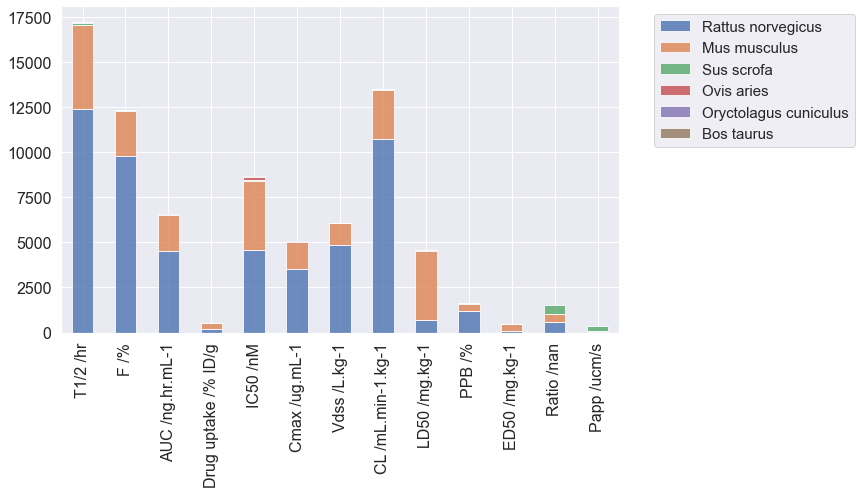

In [185]:
df_counts.plot(figsize=(10,6), kind='bar', alpha=0.8, stacked=True, fontsize=16)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')